### About This File
* Title: Bank Marketing
* There are two datasets: 1) bank-full.csv with all examples, ordered by date (from May 2008 to November 2010). 2) bank.csv with 10% of the examples (4521), randomly selected from bank-full.csv
    * Sources Created by: Paulo Cortez (Univ. Minho) and Sérgio Moro (ISCTE-IUL) @ 2012
* Click here for dataset <a href="https://github.com/Rishabh-Pareek/raw_images/blob/master/bank-full.csv">click here</a>
    
### Past Usage:
* S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.
### Relevant Information:
* The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed.
* The classification goal is to predict if the client will subscribe a term deposit (variable y).


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualization
%matplotlib inline
import seaborn as sns# visualization
from pandas_profiling import ProfileReport 
import warnings # ignores pink warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('bank/bank-full.csv')

In [3]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [121]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

### Data Analysis

In [17]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [18]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
no,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


In [19]:
data.y.value_counts()

no     39922
yes     5289
Name: y, dtype: int64

In [29]:
countyes=len(data[data.y=='yes'])
countno= len(data[data.y=='no'])
print('percentage of yes -->',countyes/len(data.y)*100)
print('percentage of no -->',countno/len(data.y)*100)

percentage of yes --> 11.698480458295547
percentage of no --> 88.30151954170445


### checking null values

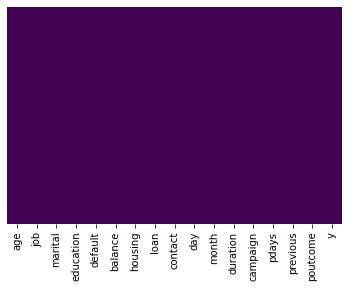

In [32]:
sns.heatmap(data.isnull(),yticklabels=False, cbar=False, cmap='viridis')

In [34]:
data[data.isnull()].sum()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
pdays        0.0
previous     0.0
poutcome     0.0
y            0.0
dtype: float64

In [39]:
data.isna().any()

age          False
job          False
marital      False
education    False
default      False
balance      False
housing      False
loan         False
contact      False
day          False
month        False
duration     False
campaign     False
pdays        False
previous     False
poutcome     False
y            False
dtype: bool

* There are no missing values in data

### Data visualization

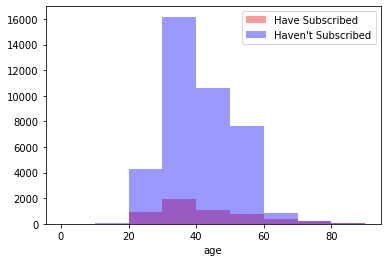

In [40]:
bins = range(0, 100, 10)
ax = sns.distplot(data.age[data.y=='yes'],
              color='red', kde=False, bins=bins, label='Have Subscribed')
sns.distplot(data.age[data.y=='no'],
         ax=ax,  # Overplots on first plot
         color='blue', kde=False, bins=bins, label="Haven't Subscribed")
plt.legend()
plt.show()

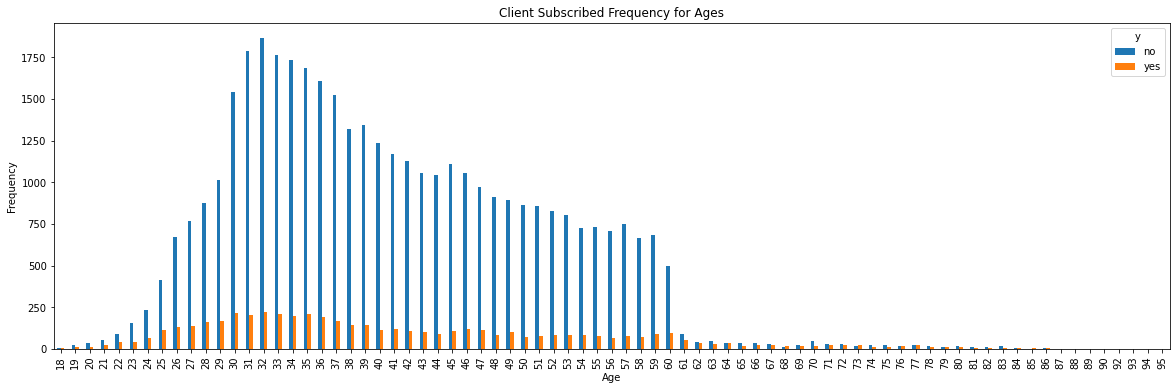

In [41]:
pd.crosstab(data.age,data.y).plot(kind="bar",figsize=(20,6))
plt.title('Client Subscribed Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

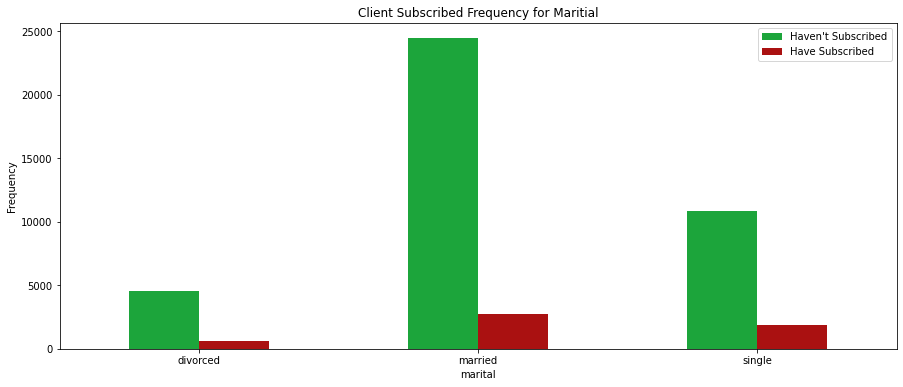

In [42]:
pd.crosstab(data.marital,data.y).plot(kind="bar",figsize=(15,6),color=['#1CA53B','#AA1111' ])
plt.title('Client Subscribed Frequency for Maritial')
plt.xlabel('marital')
plt.xticks(rotation=0)
plt.legend(["Haven't Subscribed", "Have Subscribed"])
plt.ylabel('Frequency')
plt.show()

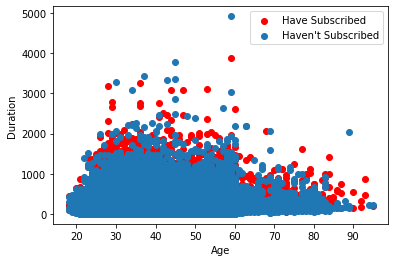

In [43]:
plt.scatter(x=data.age[data.y=='yes'], y=data.duration[(data.y=='yes')], c="red")
plt.scatter(x=data.age[data.y=='no'], y=data.duration[(data.y=='no')])
plt.legend(["Have Subscribed", "Haven't Subscribed"])
plt.xlabel("Age")
plt.ylabel("Duration")
plt.show()

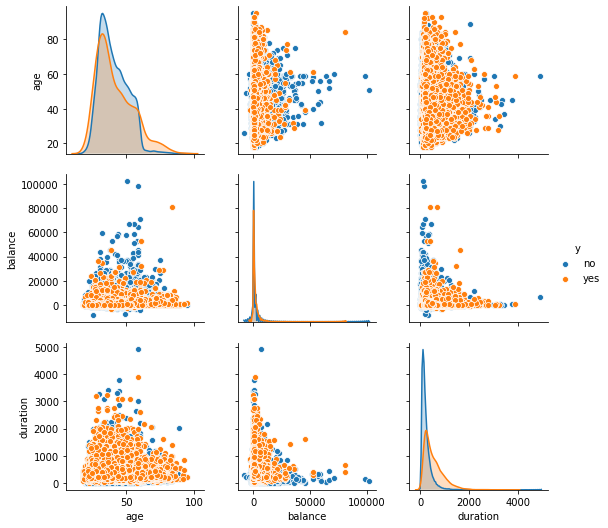

In [44]:
sns.pairplot(data=data, hue='y', vars= ['age', 'balance', 'duration'])

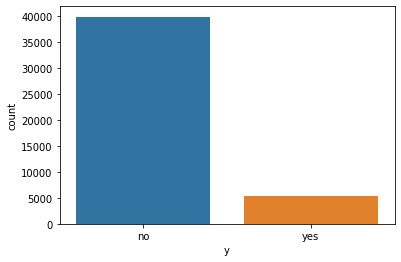

In [45]:
sns.countplot(x='y', data=data, label='Count')

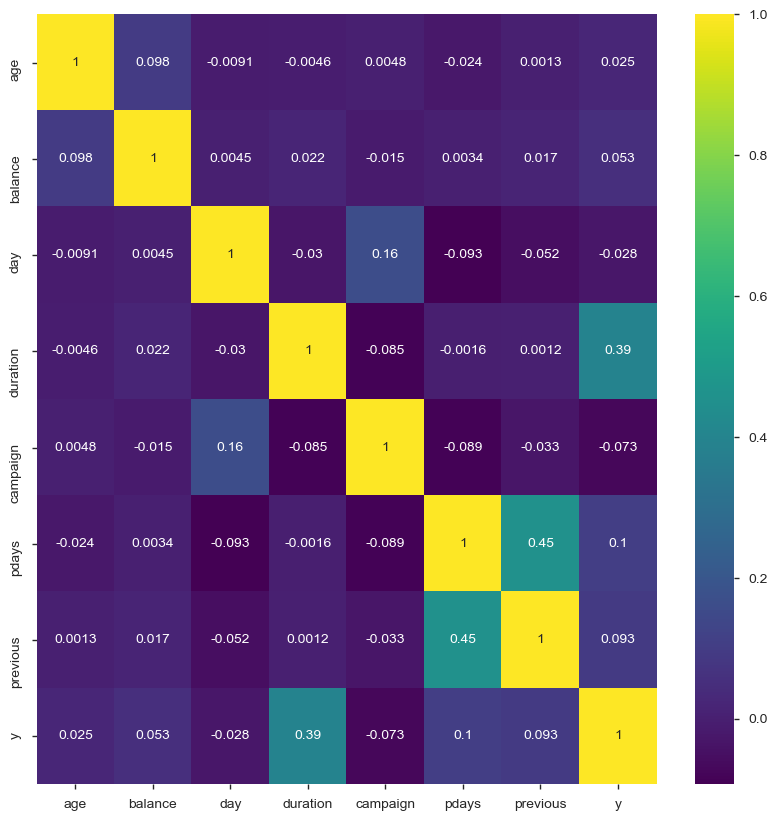

In [226]:
plt.figure(figsize=(10,10))
sns.heatmap(data=data.corr(), annot=True, cmap='viridis')

In [14]:
from sklearn.preprocessing import OrdinalEncoder

In [15]:
oe= OrdinalEncoder()

In [35]:
data['y']= oe.fit_transform(data[['y']])
data.y=data.y.astype('int64')

In [127]:
data.y.sample(10)

32546    0
24847    0
5042     0
30530    1
15945    0
29416    0
16971    0
43291    1
29261    0
17995    0
Name: y, dtype: int64

### Pre-modeling

In [5]:
feature_data= data.drop(columns=['y','job','marital', 'education', 'contact', 
             'housing', 'loan', 'day', 'month', 'poutcome' ])
target_data= data.y

In [149]:
feature_data.head()

,age,default,balance,duration,campaign,pdays,previous
0,58,no,2143,261,1,-1,0
1,44,no,29,151,1,-1,0
2,33,no,2,76,1,-1,0
3,47,no,1506,92,1,-1,0
4,33,no,1,198,1,-1,0


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

* Creating pipeline

In [151]:
num_data = feature_data.select_dtypes(include = ['int','float'])
cat_data = feature_data.select_dtypes(include= ['object'])

In [152]:
num_pipeline = make_pipeline(StandardScaler())
cat_pipeline = make_pipeline(OrdinalEncoder())

In [153]:
preprocessor = make_column_transformer(
               (cat_pipeline,cat_data.columns),
               (num_pipeline,num_data.columns)
               )

In [154]:
trainX, testX, trainY, testY = train_test_split(feature_data, target_data)

In [155]:
pipeline = make_pipeline(preprocessor, LogisticRegression())

In [156]:
pipeline.fit(trainX, trainY)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('ordinalencoder',
                                                                   OrdinalEncoder())]),
                                                  Index(['default'], dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index([], dtype='object'))])),
                ('logisticregression', LogisticRegression())])

In [157]:
pipeline.score(testX,testY)

0.8812704591701318

In [158]:
# score= pipeline.score(testX,testY).predict(testX)
print(classification_report(testY,pipeline.predict(testX)))
print(confusion_matrix(testY,pipeline.predict(testX)))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94      9961
           1       0.00      0.00      0.00      1342

    accuracy                           0.88     11303
   macro avg       0.44      0.50      0.47     11303
weighted avg       0.78      0.88      0.83     11303

[[9961    0]
 [1342    0]]


In [6]:
import plotly.express as px

In [36]:
df = pd.DataFrame(target_data.value_counts())

In [37]:
df.head()

,y
no,39922
yes,5289


In [38]:
fig = px.bar(df, x=df.index, y=df.y)
fig.show()

* In this data we have recall_score =0.0,f1_score= 0.0  for target class 1 which is very bad
* We need to balance target value which is imbalance. To improve F1 score and recall score

In [10]:
from imblearn.over_sampling import RandomOverSampler,SMOTE

In [20]:
col= feature_data.columns
feature_data[col]= oe.fit_transform(feature_data[col])

In [23]:
sc = StandardScaler()
feature_data[col]= sc.fit_transform(feature_data[col]) 

In [24]:
smote = SMOTE()

In [25]:
feature_s, target_s = smote.fit_sample(feature_data,target_data)

In [26]:
df = pd.DataFrame(target_s.value_counts())

In [27]:
df.head()

,y
no,39922
yes,39922


In [28]:
fig = px.bar(df, x=df.index, y=df.y)
fig.show()

In [170]:
trainX, testX, trainY, testY = train_test_split(feature_s, target_s)

In [171]:
lr= LogisticRegression()

In [172]:
lr.fit(trainX,trainY)

LogisticRegression()

In [173]:
lr.score(testX,testY)

0.7624868493562447

In [174]:
lr_report=classification_report(testY,lr.predict(testX))

In [175]:
print(lr_report)
print(confusion_matrix(testY,lr.predict(testX)))

              precision    recall  f1-score   support

           0       0.74      0.81      0.77     10053
           1       0.79      0.71      0.75      9908

    accuracy                           0.76     19961
   macro avg       0.76      0.76      0.76     19961
weighted avg       0.76      0.76      0.76     19961

[[8153 1900]
 [2841 7067]]


* we have improved recall_score and f1_score by balancing dataset
* Improving Fruther

* Using DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [176]:
dt = DecisionTreeClassifier()

In [177]:
dt.fit(trainX,trainY)

DecisionTreeClassifier()

In [178]:
dt.score(testX,testY)

0.8732027453534392

In [179]:
dt_report = classification_report(testY,dt.predict(testX))

In [180]:
print(dt_report)
print(confusion_matrix(testY,dt.predict(testX)))

              precision    recall  f1-score   support

           0       0.88      0.87      0.87     10053
           1       0.87      0.88      0.87      9908

    accuracy                           0.87     19961
   macro avg       0.87      0.87      0.87     19961
weighted avg       0.87      0.87      0.87     19961

[[8713 1340]
 [1191 8717]]


* By using RandomForestClassifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
rt = RandomForestClassifier(n_estimators=100, n_jobs=1)

In [182]:
rt.fit(trainX,trainY)

RandomForestClassifier(n_jobs=1)

In [183]:
print('testing score',rt.score(testX,testY))
print('traning score',rt.score(trainX,trainY))

testing score 0.9143329492510395
traning score 0.9999332030793381


In [184]:
rt_report = classification_report(testY,rt.predict(testX))

In [46]:
print(rt_report)
print(confusion_matrix(testY,rt.predict(testX)))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91      9901
           1       0.90      0.93      0.91     10060

    accuracy                           0.91     19961
   macro avg       0.91      0.91      0.91     19961
weighted avg       0.91      0.91      0.91     19961

[[8810 1091]
 [ 727 9333]]


### Deployment of Model

In [207]:
data.loc[data.y==1,['age','default','balance','duration','campaign','pdays','previous','y']].head()

,age,default,balance,duration,campaign,pdays,previous,y
83,59,no,2343,1042,1,-1,0,1
86,56,no,45,1467,1,-1,0,1
87,41,no,1270,1389,1,-1,0,1
129,55,no,2476,579,1,-1,0,1
168,54,no,184,673,2,-1,0,1


In [223]:
data.loc[data.y==0,['age','default','balance','duration','campaign','pdays','previous','y']]

,age,default,balance,duration,campaign,pdays,previous,y
0,58,no,2143,261,1,-1,0,0
1,44,no,29,151,1,-1,0,0
2,33,no,2,76,1,-1,0,0
3,47,no,1506,92,1,-1,0,0
4,33,no,1,198,1,-1,0,0
...,...,...,...,...,...,...,...,...
45194,59,no,138,162,2,187,5,0
45198,37,no,1428,333,2,-1,0,0
45199,34,no,1475,1166,3,530,12,0
45209,57,no,668,508,4,-1,0,0


In [214]:
import pickle# use to dump model 

In [215]:
pickle.dump(rt,open('bank_pridection.pkl','wb'))

In [216]:
loaded_model = pickle.load(open('bank_pridection.pkl', 'rb'))


In [217]:
loaded_model.predict([[37,0,2971,361,2,188,11]]) #inserting values where data.y== 0

array([0], dtype=int64)

In [219]:
loaded_model.predict([[56,0,45,1467,1,-1,0]])# #inserting values where data.y== 1

array([1], dtype=int64)